## Section 1: 11:00 am

In [ ]:
import pandas as pd, numpy as np, statsmodels.api as sm, seaborn as sns

df = pd.read_csv("https://www.ishelp.info/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
y = df.charges
X = df[['age', 'bmi', 'children']].assign(const=1)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           8.80e-37
Time:                        17:50:00   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          239.9945     22.289     10.767      0.0

In [ ]:
predictions_1 = results.fittedvalues

In [ ]:
print(results.predict([19, 27.9, 0, 1]))

[6908.77753344]


### Dummy Codes

In [ ]:
df_dummies = pd.get_dummies(df, columns=['smoker'])
df_dummies.head()

,age,sex,bmi,children,region,charges,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,0,1
1,18,male,33.770,1,southeast,1725.55230,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0
4,32,male,28.880,0,northwest,3866.85520,1,0


In [ ]:
df_dummies = pd.get_dummies(df, columns=['smoker'], drop_first=True)
df_dummies.head()

,age,sex,bmi,children,region,charges,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,1
1,18,male,33.770,1,southeast,1725.55230,0
2,28,male,33.000,3,southeast,4449.46200,0
3,33,male,22.705,0,northwest,21984.47061,0
4,32,male,28.880,0,northwest,3866.85520,0


In [ ]:
df_dummies = df.copy()

for col in df:
  if not pd.api.types.is_numeric_dtype(df[col]):
    df_dummies = pd.get_dummies(df_dummies, columns=[col], drop_first=True, prefix="", prefix_sep="")

df_dummies.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
X = df_dummies.drop(columns=['charges']).assign(const=1)
results = sm.OLS(y, X).fit()
predictions_1 = results.fittedvalues
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:50:00   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.8564     11.899     21.587      0.0

In [ ]:
from sklearn import preprocessing
df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_dummies), columns=df_dummies.columns)
df_zscore.head()


,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


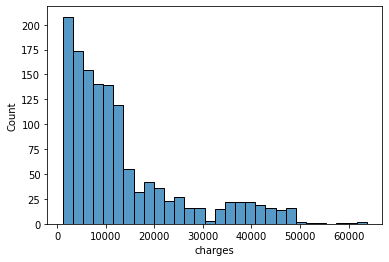

In [ ]:
sns.histplot(df.charges);

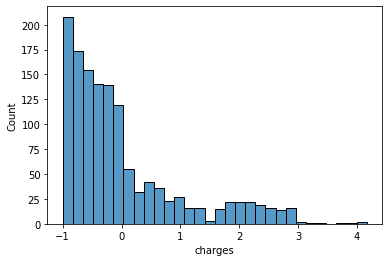

In [ ]:
sns.histplot(df_zscore.charges);

In [ ]:
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_dummies), columns=df_dummies.columns)
df_minmax.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,0.021739,0.321227,0.0,0.251611,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,0.0,1.0,0.0,0.0


In [ ]:
y = df_minmax.charges
X = df_minmax.drop(columns=['charges']).assign(const=1)
print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:50:00   Log-Likelihood:                 1230.9
No. Observations:                1338   AIC:                            -2444.
Df Residuals:                    1329   BIC:                            -2397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1886      0.009     21.587      0.0

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:50:01   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0346      0.001     39.655      0.0

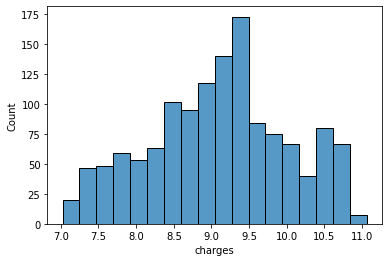

In [ ]:
y = np.log(df_dummies.charges)
X = df_dummies.drop(columns=['charges']).assign(const=1)
results = sm.OLS(y, X).fit()
print(results.summary())
sns.histplot(y)

In [ ]:
pd.DataFrame({'charges':df.charges, 'predictions_1': predictions_1, 'predictions_2':np.exp(results.fittedvalues)})

,charges,predictions_1,predictions_2
0,16884.92400,25293.713028,13175.803757
1,1725.55230,3448.602834,2904.274920
2,4449.46200,6706.988491,4979.927092
3,21984.47061,3754.830163,4172.303537
4,3866.85520,5592.493386,4377.492973
...,...,...,...
1333,10600.54830,12351.323686,11386.969038
1334,2205.98080,3511.930809,3229.078110
1335,1629.83350,4149.132486,2947.442401
1336,2007.94500,1246.584939,2901.231976


In [ ]:
def vif(df):
  import pandas as pd
  from sklearn.linear_model import LinearRegression
  
  # initialize dictionaries
  vif_dict, tolerance_dict = {}, {}

  # form input data for each exogenous variable
  for col in df.drop(columns=['const']):
    y = df[col]
    X = df.drop(columns=[col])
    
    # extract r-squared from the fit
    r_squared = LinearRegression().fit(X, y).score(X, y)

    # calculate VIF
    if r_squared < 1: # Prevent division by zero runtime error
      vif = 1/(1 - r_squared) 
    else:
      vif = 100
    vif_dict[col] = vif

    # calculate tolerance
    tolerance = 1 - r_squared
    tolerance_dict[col] = tolerance

    # generate the DataFrame to return
    df_output = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

  return df_output.sort_values(by=['VIF'], ascending=False)

vif(X)

# VIF < 10 is adequate
# VIF < 5 is good
# VIF < 3 is ideal
# Remove any variable > 10 for sure

,VIF,Tolerance
southeast,1.652230,0.605243
southwest,1.529411,0.653846
northwest,1.518823,0.658405
bmi,1.106630,0.903645
age,1.016822,0.983456
yes,1.012074,0.988070
male,1.008900,0.991178
children,1.004011,0.996005


## Section 2: 12:30 am

In [1]:
import pandas as pd, numpy as np, statsmodels.api as sm, seaborn as sns

df = pd.read_csv("https://www.ishelp.info/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
y = df.charges
X = df[['age', 'bmi', 'children']].assign(const=1)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           8.80e-37
Time:                        12:36:19   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          239.9945     22.289     10.767      0.0

In [8]:
# predict all variables
predictions_1 = results.fittedvalues
print(predictions_1.head())

#predict values one at a time
# results.predict([19, 27.9, 0, 1])

0     6908.777533
1     9160.977061
2    12390.946918
3     8543.527095
4    10354.147396
dtype: float64


In [14]:
#create dummy code out of categorical variables
df_dummies = df.copy()
df_dummies = pd.get_dummies(df_dummies, columns=['smoker'], prefix="", prefix_sep="", drop_first=True)
df_dummies.head()

,age,sex,bmi,children,region,charges,yes
0,19,female,27.900,0,southwest,16884.92400,1
1,18,male,33.770,1,southeast,1725.55230,0
2,28,male,33.000,3,southeast,4449.46200,0
3,33,male,22.705,0,northwest,21984.47061,0
4,32,male,28.880,0,northwest,3866.85520,0


In [20]:
# use a loop to create dummy code for all categorical variables in a df
df_dummies = df.copy()

for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df_dummies = pd.get_dummies(df_dummies, columns=[col], drop_first=True, prefix="", prefix_sep="")
df_dummies.head()


,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [23]:
#do another mlr after making dummy code
y = df_dummies.charges
X = df_dummies.drop(columns=['charges']).assign(const=1)
results = sm.OLS(y, X).fit()
predictions_2 = results.fittedvalues
print(results.summary())
print(predictions_2.head())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:49:17   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          256.8564     11.899     21.587      0.0

## Standardizing and Normalizing

In [26]:
#Standardizing the data. Has kinda fallen out of favor. Normalizing is the new cool thing
#brings 97% of the data to the same scale (-3 to 3)
from sklearn import preprocessing
df_zscore = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_dummies), columns=df_dummies.columns)
df_zscore.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


In [27]:
#Normalizing the data
#Brings everything between 0-1
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_dummies), columns=df_dummies.columns)
df_minmax.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,0.021739,0.321227,0.0,0.251611,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,1.0,0.0,1.0,0.0,0.0


<AxesSubplot:xlabel='charges', ylabel='Count'>

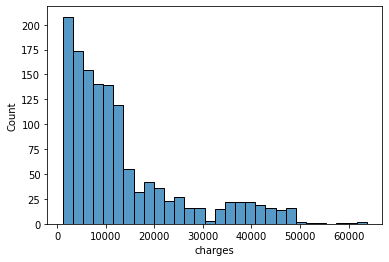

In [28]:
sns.histplot(df.charges)

<AxesSubplot:xlabel='charges', ylabel='Count'>

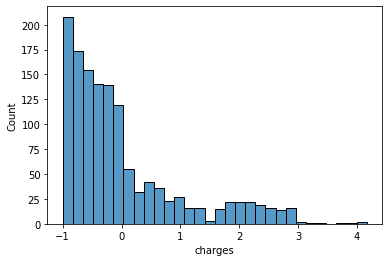

In [35]:
#shows that using min max doesn't actually change the data. just makes it comparable
sns.histplot(df_zscore.charges)

In [36]:
# Now we can directly compare the coefficients because they are all on the same scale
y = df_minmax.charges
X = df_minmax.drop(columns=['charges']).assign(const=1)
print(sm.OLS(y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:02:45   Log-Likelihood:                 1230.9
No. Observations:                1338   AIC:                            -2444.
Df Residuals:                    1329   BIC:                            -2397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1886      0.009     21.587      0.0

## Fixing skewed data

In [38]:
y = np.log(df_dummies.charges)
X = df_dummies.drop(columns=['charges']).assign(const=1)
results = sm.OLS(y, X).fit()
predictions_3 = results.fittedvalues
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:06:11   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0346      0.001     39.655      0.0

In [40]:
pd.DataFrame({'charges':df.charges, 'predictions_1': predictions_1, 'predictions_2':predictions_2, 'predictions_3':np.exp(predictions_3)})


,charges,predictions_1,predictions_2,predictions_3
0,16884.92400,6908.777533,25293.713028,13175.803757
1,1725.55230,9160.977061,3448.602834,2904.274920
2,4449.46200,12390.946918,6706.988491,4979.927092
3,21984.47061,8543.527095,3754.830163,4172.303537
4,3866.85520,10354.147396,5592.493386,4377.492973
...,...,...,...,...
1333,10600.54830,16996.696122,12351.323686,11386.969038
1334,2205.98080,8003.758184,3511.930809,3229.078110
1335,1629.83350,9640.929171,4149.132486,2947.442401
1336,2007.94500,6691.391417,1246.584939,2901.231976


## Check for multicollinearity (VIF Score)

In [41]:
def vif(df):
  import pandas as pd
  from sklearn.linear_model import LinearRegression
  
  # initialize dictionaries
  vif_dict, tolerance_dict = {}, {}

  # form input data for each exogenous variable
  for col in df.drop(columns=['const']):
    y = df[col]
    X = df.drop(columns=[col])
    
    # extract r-squared from the fit
    r_squared = LinearRegression().fit(X, y).score(X, y)

    # calculate VIF
    if r_squared < 1: # Prevent division by zero runtime error
      vif = 1/(1 - r_squared) 
    else:
      vif = 100

    # add vif score to dictionary
    vif_dict[col] = vif

    # calculate tolerance
    tolerance = 1 - r_squared
    tolerance_dict[col] = tolerance

    # generate the DataFrame to return
    df_output = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

  return df_output.sort_values(by=['VIF'], ascending=False)

vif(X)

# VIF < 10 is adequate
# VIF < 5 is good
# VIF < 3 is ideal
# Remove any variable > 10 for sure

,VIF,Tolerance
southeast,1.652230,0.605243
southwest,1.529411,0.653846
northwest,1.518823,0.658405
bmi,1.106630,0.903645
age,1.016822,0.983456
yes,1.012074,0.988070
male,1.008900,0.991178
children,1.004011,0.996005
